<a href="https://colab.research.google.com/github/May-o-nnaise/CPSMA-3933-MS/blob/main/SimpsonMasonProject4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Programming Assignment

##Redo A WeBWorK Question Using Python
###1. x + y <= 3

   9x + y <= 5

   x >= 0

   y >= 0

###2 and 3

In [ ]:
import numpy as np

A1 = np.array([[1, 1], [9, 1]])
B1 = np.array([3, 5])

P1 = np.linalg.solve(A1, B1)

P2 = np.linalg.solve(np.array([[1, 1], [1, 0]]), np.array([3, 0]))

P3 = np.linalg.solve(np.array([[9, 1], [0, 1]]), np.array([5, 0]))

P4 = np.array([0, 0])

print("Corner points of the feasible region:")
print(f"P1 = ({P1[0]:.2f}, {P1[1]:.2f})")
print(f"P2 = ({P2[0]:.2f}, {P2[1]:.2f})")
print(f"P3 = ({P3[0]:.2f}, {P3[1]:.2f})")
print(f"P4 = ({P4[0]:.2f}, {P4[1]:.2f})")



Corner points of the feasible region:
P1 = (0.25, 2.75)
P2 = (0.00, 3.00)
P3 = (0.56, 0.00)
P4 = (0.00, 0.00)


Used the method from the book to solve and manually plugged in the values for the p2-p4

Intersection of the two inequalities: [0.25 2.75]


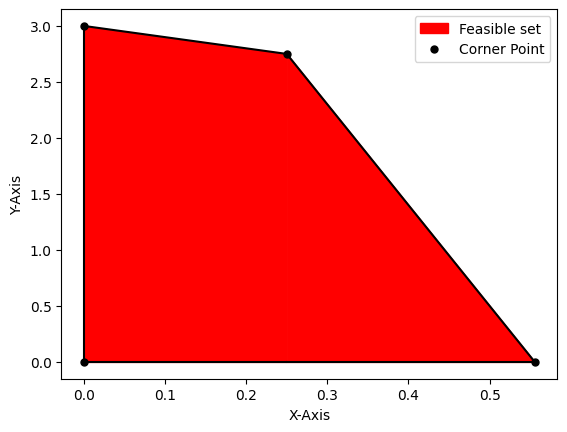

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

A = np.array([[1,1],[9,1]])
B = np.array([3,5])

intersection = np.linalg.solve(A[0:2],B[0:2])

print("Intersection of the two inequalities:", intersection)

x1= np.arange(0,0.25,0.001)
x2= np.arange(0.25,0.555556,0.001)

y1 = (3-1*x1)/1
y2 = (5-9*x2)/1

x_points = [0, 0, 0.25, 0.555556]
y_points = [0, 3, 2.75, 0]
#plt.plot(x_points, y_points, color="black")

plt.plot(x1,y1, color = "black")
plt.plot(x2,y2, color = "black")

plt.plot(x1,np.zeros(len(x1)), color = "black")
plt.plot(x2,np.zeros(len(x2)), color = "black")
plt.plot(np.zeros(len(np.arange(0,3.1,.1))),np.arange(0,3.1,.1),color = "black")

plt.fill_between(x1,0,y1, color = "red")
plt.fill_between(x2,0,y2, color = "red")

plt.scatter(0,0, s = 25, color = "black")
plt.scatter(0,3, s = 25, color = "black")
plt.scatter(0.25,2.75, s = 25, color = "black")
plt.scatter(0.555556,0, s = 25, color = "black")


red_patch = mpatches.Patch(color='red', label='Feasible set')
black_dot = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Corner Point')
plt.legend(handles=[red_patch, black_dot])
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()


Pretty simple, just put dots on the points and plotted the lines and filled it in with red because it is my favorite color.

###4. Corner that maximizes P=3x+2y

In [ ]:
x_points = [0, 0, 0.25, 0.555556]
y_points = [0, 3, 2.75, 0]
GP = 0

for i in range(len(x_points)):
  P=3*x_points[i]+2*y_points[i]
  print(f"P at ({x_points[i]}, {y_points[i]}): {P}")
  if P > GP:
    GP = P
print(f"Maximum: {GP}")


P at (0, 0): 0
P at (0, 3): 6
P at (0.25, 2.75): 6.25
P at (0.555556, 0): 1.666668
Maximum: 6.25


I entered the points and then plugged into an array and then I made it use a for loop to go through the array using the length and since each array is the same length I only had to use the length of one and had it plug into the equation and whatever value is the largest is what would save.

###5. Slack Variables Corner Points


x + y + s1 <= 3

   9x + y + s2 <= 5

   x >= 0

   y >= 0

Restate it with slack variables. Dont forget what sign the slack should be

In [13]:
import numpy as np

corner_points = [(0.25, 2.75), (0.00, 3.00), (0.55555556, 0.00), (0.00, 0.00)]

print("Calculating slack variables at each corner point:")
for point in corner_points:
    S, D = point
    s1 = 3 - (1*S + 1*D)
    s2 = 5 - (9*S + 1*D)
    print(f"At point ({S}, {D}): s1 = {s1:.2f}, s2 = {s2:.2f}")

Calculating slack variables at each corner point:
At point (0.25, 2.75): s1 = 0.00, s2 = 0.00
At point (0.0, 3.0): s1 = 0.00, s2 = 2.00
At point (0.55555556, 0.0): s1 = 2.44, s2 = -0.00
At point (0.0, 0.0): s1 = 3.00, s2 = 5.00


This one was kind of fun because you could do it by hand very easily but it is cool to know I can make a program to do it for me.

###6. Graph the slack variables and original

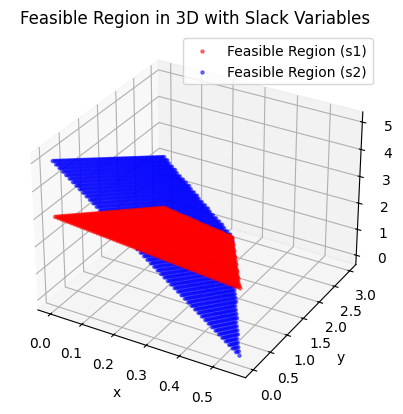

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, 1, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)

S1 = 3 - X - Y
S2 = 5 - 9*X - Y

mask = (X >= 0) & (Y >= 0) & (S1 >= 0) & (S2 >= 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[mask], Y[mask], S1[mask], c='r', marker='.', alpha=0.5, label='Feasible Region (s1)')
ax.scatter(X[mask], Y[mask], S2[mask], c='b', marker='.', alpha=0.5, label='Feasible Region (s2)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Slack Variables (s1, s2)')
ax.set_title('Feasible Region in 3D with Slack Variables')
ax.legend()

plt.show()

Dont ask.

###Actual 6.

In [27]:
from scipy.optimize import linprog
A = np.array([[1,1],[9,1]])
b = np.array([3,5])

linprog([-3,-2],A[:,[0,1]],b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -6.25
              x: [ 2.500e-01  2.750e+00]
            nit: 2
          lower:  residual: [ 2.500e-01  2.750e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-1.875e+00 -1.250e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

I  this is right because the highest value you should be able to get is 6.25 which is the same as what I got calculating it my way.

##Redo a WeBWorK Question Using Python 2

A company manufactures two models of snowboards, standard and deluxe. Each deluxe model requires 26 hours to produce, and 60 units of material. Each standard model requires 13 hours to produce and 50 units of material. The company has 832 production hours available and 2400 units of material in stock. The deluxe model sells for $324 and the standard model sells for $180.

What amount of each model should be produced and sold to obtain the maximum revenue?

20 deluxe models

24 standard models

What is the maximum revenue? $10800

$$
P = 180S + 324D
$$


$$
\left\{
\begin{array}{l}
50S + 60D \le 2400 \\
13S + 26D \le 832 \\
S\geq0 \\
D\geq0 \\
\end{array}
\right.
$$


Took a while for me to find a guide on how to do this that actually worked but look how pretty it looks now.

###2 and 3

In [ ]:
import numpy as np


A1 = np.array([[50, 60], [13, 26]])
B1 = np.array([2400, 832])

P1 = np.linalg.solve(A1, B1)

P2 = np.linalg.solve(np.array([[50, 60], [0, 1]]), np.array([2400, 0]))

P3 = np.linalg.solve(np.array([[13, 26], [1, 0]]), np.array([832, 0]))

P4 = np.array([0, 0])



print("Corner points of the feasible region:")
print(f"P1 = ({P1[0]:.2f}, {P1[1]:.2f})")
print(f"P2 = ({P2[0]:.2f}, {P2[1]:.2f})")
print(f"P3 = ({P3[0]:.2f}, {P3[1]:.2f})")
print(f"P4 = ({P4[0]:.2f}, {P4[1]:.2f})")

Corner points of the feasible region:
P1 = (24.00, 20.00)
P2 = (48.00, 0.00)
P3 = (0.00, 32.00)
P4 = (0.00, 0.00)


UIsed the linalg solve function as shown in the book and then manually plugged in the other values of the conditions to find the corner points.

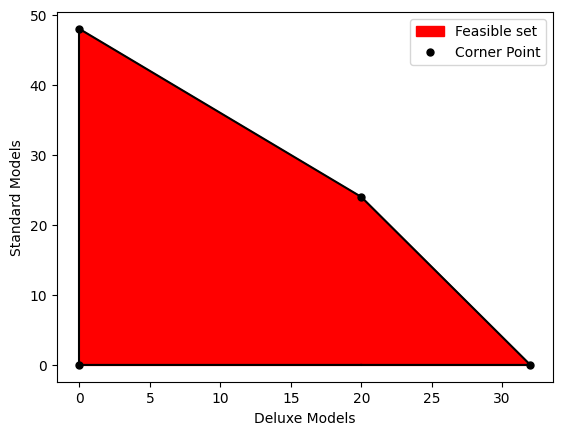

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

x1= np.arange(0,20,.01)
x2= np.arange(20,32,.01)

y1 = (2400-60*x1)/50
y2 = (832-26*x2)/13

x_points = [0, 0, 20, 32]
y_points = [0, 48, 24, 0]
#plt.plot(x_points, y_points, color="black")

plt.plot(x1,y1, color = "black")
plt.plot(x2,y2, color = "black")



plt.fill_between(x1,0,y1, color = "red")
plt.fill_between(x2,0,y2, color = "red")

plt.scatter(0,0, s = 25, color = "black")
plt.scatter(0,48, s = 25, color = "black")
plt.scatter(20,24, s = 25, color = "black")
plt.scatter(32,0, s = 25, color = "black")

plt.plot(x1,np.zeros(len(x1)), color = "black")
plt.plot(x2,np.zeros(len(x2)), color = "black")
plt.plot(np.zeros(len(np.arange(0,48,.1))),np.arange(0,48,.1),color = "black")

red_patch = mpatches.Patch(color='red', label='Feasible set')
black_dot = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Corner Point')
plt.legend(handles=[red_patch, black_dot])
plt.xlabel("Deluxe Models")
plt.ylabel("Standard Models")
plt.show()


Simple graph just mapped out the corner points and colored it red since its my favorite colors. Made sure to label the x and y axis because I always end up doing it kinda backwards and then stuck to it.

###maximize

In [ ]:
x_points = [0, 0, 20, 32]
y_points = [0, 48, 24, 0]
GP = 0

for i in range(len(x_points)):
  P=324*x_points[i]+180*y_points[i]
  print(f"P at ({x_points[i]}, {y_points[i]}): {P}")
  if P > GP:
    GP = P
print(f"Maximum: {GP}")


P at (0, 0): 0
P at (0, 48): 8640
P at (20, 24): 10800
P at (32, 0): 10368
Maximum: 10800


Plug in values back into the original equation until you find which one is the greatest.

###Slack
$$
P = 180S + 324D
$$


$$
\left\{
\begin{array}{l}
50S + 60D +s_1\le 2400 \\
13S + 26D +s_2\le 832 \\
S\geq0 \\
D\geq0 \\
\end{array}
\right.
$$


In [14]:
import numpy as np

corner_points = [(24.00, 20.00), (48.00, 0.00), (0.00, 32.00), (0.00, 0.00)]

print("Calculating slack variables at each corner point:")
for point in corner_points:
    S, D = point
    s1 = 2400 - (50*S + 60*D)
    s2 = 832 - (13*S + 26*D)
    print(f"At point ({S}, {D}): s1 = {s1:.2f}, s2 = {s2:.2f}")

Calculating slack variables at each corner point:
At point (24.0, 20.0): s1 = 0.00, s2 = 0.00
At point (48.0, 0.0): s1 = 0.00, s2 = 208.00
At point (0.0, 32.0): s1 = 480.00, s2 = 0.00
At point (0.0, 0.0): s1 = 2400.00, s2 = 832.00


plugged in corner point values and basically just subtracted them from the maximums made up by the equalities.

###Graph with Slack

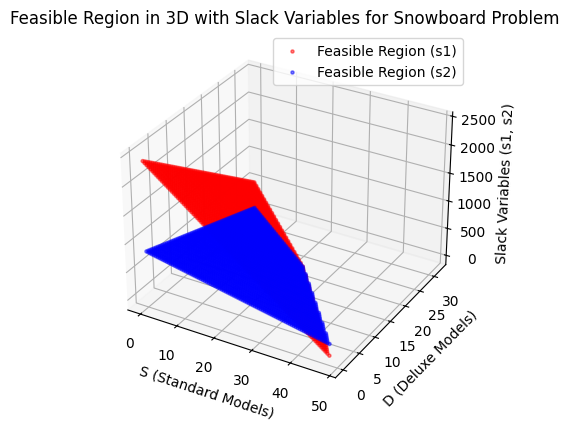

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, 50, 100)
y = np.linspace(0, 50, 100)
X, Y = np.meshgrid(x, y)

S1 = 2400 - 50*X - 60*Y
S2 = 832 - 13*X - 26*Y

mask = (X >= 0) & (Y >= 0) & (S1 >= 0) & (S2 >= 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[mask], Y[mask], S1[mask], c='r', marker='.', alpha=0.5, label='Feasible Region (s1)')
ax.scatter(X[mask], Y[mask], S2[mask], c='b', marker='.', alpha=0.5, label='Feasible Region (s2)')

ax.set_xlabel('S (Standard Models)')
ax.set_ylabel('D (Deluxe Models)')
ax.set_zlabel('Slack Variables (s1, s2)')
ax.set_title('Feasible Region in 3D with Slack Variables for Snowboard Problem')
ax.legend()

plt.show()

Dont ask

###6.

In [12]:
from scipy.optimize import linprog
A = np.array([[50,60],[13,26]])
b = np.array([2400,832])

linprog([-180,-324],A[:,[0,1]],b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -10800.0
              x: [ 2.400e+01  2.000e+01]
            nit: 2
          lower:  residual: [ 2.400e+01  2.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-9.000e-01 -1.038e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

This did get the same value as I got while making the corner points and finding the maximum which was $10800 with 24 standard and 20 delux models.